<a href="https://colab.research.google.com/github/zhewenzhang/learnPython/blob/colab-learning/%E7%88%AC%E8%99%AB%E5%AD%A6%E4%B9%A0_%E5%9B%BE%E7%89%87%E6%8A%93%E5%8F%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##*导入Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##先从网站抓取图片
###获取链接
女朋友要我找首饰珠宝图片，我就想从这个网站上抓取一些。
我首先需要调取html的链接，这里用到urlopen这个函数，这个函数是从urllab中调取的。


```
urlopen("这里写链接地址")
```

在一开是引入库的时候，因为运行版本python3，所以需要写法有所变化。

####python2的写法
```
from urllib import urlopen
```
####python3的写法
```
from urllib.request import urlopen
```
这里需要注意，如果运行环境是python3，所有关于urlopen的引入，用urllib.request。





In [0]:
import urllib.request
html = urlopen("https://www.justineclenquet.com/shop/?orderby=popularity")

我们打印一下看看结果。

In [37]:
print(html)

###提取html代码
接下来我们要把整个html的code码提取出来，这是后面进行爬虫工作的前提。我们用到bytes.decode()

In [0]:
html_code = bytes.decode(html.read())

我们打印一下html文本看一下

In [39]:
print(html_code)

<!doctype html>
<html lang="en-GB">
<head>
	<meta charset="UTF-8" />
	<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, viewport-fit=cover">
	<link rel="profile" href="https://gmpg.org/xfn/11">
	<link rel="pingback" href="https://www.justineclenquet.com/xmlrpc.php">
					<script>document.documentElement.className = document.documentElement.className + ' yes-js js_active js'</script>
			<meta http-equiv="x-dns-prefetch-control" content="on">
	<link rel="dns-prefetch" href="//fonts.googleapis.com" />
	<link rel="dns-prefetch" href="//fonts.gstatic.com" />
	<link rel="dns-prefetch" href="//0.gravatar.com/" />
	<link rel="dns-prefetch" href="//2.gravatar.com/" />
	<link rel="dns-prefetch" href="//1.gravatar.com/" /><title>Products Archive - Justine Clenquet</title>

<!-- This site is optimized with the Yoast SEO plugin v13.0 - https://yoast.com/wordpress/plugins/seo/ -->
<meta name="robots" content="max-snippet:-1, max-image-preview:larg

###抓取图片链接
我们通过网页分析可以看到，想要的图片都藏在<img>这里，这时候我们就需要从html代码中找出所有的img标签。

咱们在这里引用，**BeautifulSoup**这个python库。
```
find_all('标签名')
```


In [0]:
soup_new = BeautifulSoup(html_code)

In [41]:
from bs4 import BeautifulSoup
soup_new.find_all('img')

[<img alt="Justine Clenquet" class="logoimg bg--light" src="https://www.justineclenquet.com/wp-content/uploads/2018/07/justine-clenquet-noir-1.png"/>,
 <img alt="Justine Clenquet" class="logoimg bg--dark" src="https://www.justineclenquet.com/wp-content/uploads/2018/07/justine-clenquet-jaune-1.png"/>,
 <img alt="Eddie hoops" class="attachment-shop_catalog size-shop_catalog wp-post-image" height="350" src="https://www.justineclenquet.com/wp-content/uploads/2018/07/Eddie-hoops-3.jpg" width="350"/>,
 <img alt="" class="attachment-shop_catalog size-shop_catalog wp-post-image" height="350" src="https://www.justineclenquet.com/wp-content/uploads/2016/11/Jane-earring-1.jpg" width="350"/>,
 <img alt="John hoops" class="attachment-shop_catalog size-shop_catalog wp-post-image" height="350" src="https://www.justineclenquet.com/wp-content/uploads/2015/09/John-hoops-1.jpg" width="350"/>,
 <img alt="Justine Clenquet Drew hoop" class="attachment-shop_catalog size-shop_catalog wp-post-image" height="35

可以看到所有带img的标签都筛选出来了。然后咱们发现这些图片的链接link都在src这个代码的后面属性中。
我们用get函数读取这个属性值。
```
link = soup.find_all('img')
link.get('src')
```


In [42]:
for link in soup_new.find_all('img'):
  url = link.get('src')
  print(url)

https://www.justineclenquet.com/wp-content/uploads/2018/07/justine-clenquet-noir-1.png
https://www.justineclenquet.com/wp-content/uploads/2018/07/justine-clenquet-jaune-1.png
https://www.justineclenquet.com/wp-content/uploads/2018/07/Eddie-hoops-3.jpg
https://www.justineclenquet.com/wp-content/uploads/2016/11/Jane-earring-1.jpg
https://www.justineclenquet.com/wp-content/uploads/2015/09/John-hoops-1.jpg
https://www.justineclenquet.com/wp-content/uploads/2019/06/Drew-hoop-1.jpg
https://www.justineclenquet.com/wp-content/uploads/2016/11/Mini-Gloria-hoops.jpg
https://www.justineclenquet.com/wp-content/uploads/2017/05/Hari-choker-web.jpg
https://www.justineclenquet.com/wp-content/uploads/2017/05/Debbie-hoops.jpg
https://www.justineclenquet.com/wp-content/uploads/2016/02/Gwen-hoops.jpg
https://www.justineclenquet.com/wp-content/uploads/2019/06/Dustin-hoop-1.jpg
https://www.justineclenquet.com/wp-content/uploads/2017/05/Lana-hoops.jpg
https://www.justineclenquet.com/wp-content/uploads/2018/07

你看，我们用for的循环提取了所有的图片链接。接下来就是把他们存到本地了。
###保存成图片
这里我们用到urlretrieve这个函数
```
urlretrieve(文件网址,存放地址+文件名）
```

In [43]:
url_pic_eg ="https://www.justineclenquet.com/wp-content/uploads/2019/07/Dana-earrings.jpg"
print(url_pic_eg)

urllib.request.urlretrieve(url_pic_eg,'/content/drive/My Drive/Colab/pic/eg01.jpg')
print("done")

https://www.justineclenquet.com/wp-content/uploads/2019/07/Dana-earrings.jpg
done


我们来看一下这个图片，是否有存入文档中。

In [23]:
import os
file_dir = "/content/drive/My Drive/Colab/pic"
os.listdir(file_dir)

['1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '50.jpg',
 'eg01.jpg']

是的，eg01.jpg已经存储到这里了，我们打开图片看看是否是我们想要的那张。

图片显示读取的方法，我是学习这篇链接[知乎-Python Image Library基本图片读取与操作](https://zhuanlan.zhihu.com/p/32531872)。

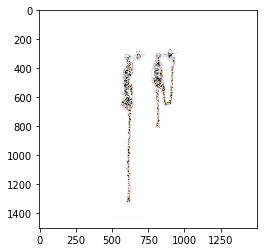

Show


In [26]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("/content/drive/My Drive/Colab/pic/eg01.jpg")
plt.imshow(img)
plt.show()
plt.close()
print('Show')

到这里我们就会从网页中抓取图片链接，并且保存到本地了。

最后我们来批量保存一下。

在这一步我学习了一下Str()的用法，他可以把Int数值变成Str字符，[学习网址](https://www.36nu.com/question/61)

In [44]:
i = 1
for link in soup_new.find_all('img'):
  url=link.get('src')
  print("Find Eg"+str(i))
  urllib.request.urlretrieve(url,'/content/drive/My Drive/Colab/pic/Eg'+str(i)+'.jpg')
  i=i+1
  print("Save Eg"+str(i))

Find Eg1
Save Eg2
Find Eg2
Save Eg3
Find Eg3
Save Eg4
Find Eg4
Save Eg5
Find Eg5
Save Eg6
Find Eg6
Save Eg7
Find Eg7
Save Eg8
Find Eg8
Save Eg9
Find Eg9
Save Eg10
Find Eg10
Save Eg11
Find Eg11
Save Eg12
Find Eg12
Save Eg13
Find Eg13
Save Eg14
Find Eg14
Save Eg15
Find Eg15
Save Eg16
Find Eg16
Save Eg17
Find Eg17
Save Eg18
Find Eg18
Save Eg19
Find Eg19
Save Eg20
Find Eg20
Save Eg21
Find Eg21
Save Eg22
Find Eg22
Save Eg23
Find Eg23
Save Eg24
Find Eg24
Save Eg25
Find Eg25
Save Eg26
Find Eg26
Save Eg27
Find Eg27
Save Eg28
Find Eg28
Save Eg29
Find Eg29
Save Eg30
Find Eg30
Save Eg31
Find Eg31
Save Eg32
Find Eg32
Save Eg33
Find Eg33
Save Eg34
Find Eg34
Save Eg35
Find Eg35
Save Eg36
Find Eg36
Save Eg37
Find Eg37
Save Eg38
Find Eg38
Save Eg39
Find Eg39
Save Eg40
Find Eg40
Save Eg41
Find Eg41
Save Eg42
Find Eg42
Save Eg43
Find Eg43
Save Eg44
Find Eg44
Save Eg45
Find Eg45
Save Eg46
Find Eg46
Save Eg47
Find Eg47
Save Eg48
Find Eg48
Save Eg49
Find Eg49
Save Eg50
Find Eg50
Save Eg51


###阶段性代码汇整
再回过头复习一下，我们用到了几个库



1.   urllib
2.   BeautifulSoup

分别是读取网站文件、进行文件解析用的。最后将其用for语句批量存档，这样就不需要一个一个图片保存了。



In [0]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import urllib.request
html = urlopen("https://www.justineclenquet.com/shop/")
html_test = bytes.decode(html.read())
soup = BeautifulSoup(html_test)
#print(soup.prettify())
#print(soup.title)
#print(soup.a)
i=1
for link in soup.find_all('img'):
   url=link.get('src')
   print(url)
   #urllib.request.urlretrieve(url,'/content/drive/My Drive/Colab/pic/'+str(i)+'.jpg')
   i=i+1

###问题检讨
在我码的过程中，我发现很难抓到js写的网站，这将是后续学习的一个目标了。

**最终保存图片结果**
![效果图片](https://s2.ax1x.com/2020/02/29/360UVe.png)

